# Importing Libraries

In [59]:
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from prophet import Prophet

# Reading Data from our dataset

In [60]:
filename = "../data/data_household.csv"

In [61]:
df = pd.read_csv(filename)

In [62]:
df.count()

DateTime       34589
Consumption    34589
dtype: int64

In [63]:
df.head()

,DateTime,Consumption
0,2006-12-16 17:00:00,152.02
1,2006-12-16 18:00:00,217.93
2,2006-12-16 19:00:00,204.01
3,2006-12-16 20:00:00,196.11
4,2006-12-16 21:00:00,183.39


# Convert index to datetime

In [64]:
# reading and parsing the file into a data frame named df
df = pd.read_csv(filename,index_col = 'DateTime',parse_dates=['DateTime'])
df.head(5)

,Consumption
DateTime,
2006-12-16 17:00:00,152.02
2006-12-16 18:00:00,217.93
2006-12-16 19:00:00,204.01
2006-12-16 20:00:00,196.11
2006-12-16 21:00:00,183.39


In [65]:
# verifying that no value is null
df.isna().sum()

Consumption    0
dtype: int64

In [66]:
min(df.Consumption)

0.0

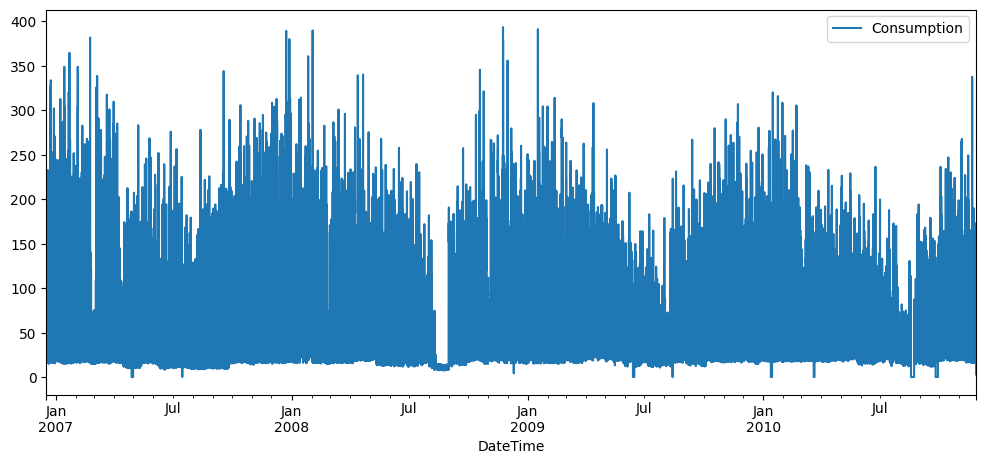

In [67]:
# plotting the values in a graph
df.plot(figsize=(12,5),legend=True)
plt.show()

# Maximum energy consumption values

In [68]:
# Getting the highest 10 consumption values in our data frame
df.nlargest(10,'Consumption')

,Consumption
DateTime,
2008-11-23 18:00:00,393.63
2009-01-16 20:00:00,391.18
2008-02-02 19:00:00,389.76
2007-12-23 19:00:00,389.28
2007-02-22 21:00:00,381.83
2007-12-28 17:00:00,380.02
2008-11-23 20:00:00,378.63
2007-01-21 20:00:00,364.59
2008-01-26 19:00:00,360.83


In [69]:
df = df.reset_index()

In [70]:
df.count()

DateTime       34589
Consumption    34589
dtype: int64

# Changing dataframe format specific to Prophet Model

In [71]:
df = df.rename(columns={'DateTime':'ds','Consumption':'y'})

In [72]:
df.count()

ds    34589
y     34589
dtype: int64

In [73]:
# getting the rows of the highest 10 consumption values
df.nlargest(10,'y')

,ds,y
16993,2008-11-23 18:00:00,393.63
18291,2009-01-16 20:00:00,391.18
9914,2008-02-02 19:00:00,389.76
8930,2007-12-23 19:00:00,389.28
1636,2007-02-22 21:00:00,381.83
9048,2007-12-28 17:00:00,380.02
16995,2008-11-23 20:00:00,378.63
867,2007-01-21 20:00:00,364.59
9746,2008-01-26 19:00:00,360.83
17163,2008-11-30 20:00:00,355.83


## Model Fitting

In [74]:
model = Prophet()

In [75]:
# Applying time series algorithms (prophet) to our data frame
model.fit(df)

18:55:27 - cmdstanpy - INFO - Chain [1] start processing
18:55:37 - cmdstanpy - INFO - Chain [1] done processing


## Predictions

In [76]:
prediction=model.predict(df)

In [77]:
org_prediction = prediction.copy()

In [78]:
prediction.nlargest(10,'yhat')

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
171,2006-12-23 20:00:00,83.403970,105.330753,222.187562,83.403970,83.403970,82.481674,82.481674,82.481674,50.934664,...,9.966313,9.966313,9.966313,21.580697,21.580697,21.580697,0.0,0.0,0.0,165.885643
3,2006-12-16 20:00:00,84.824725,106.407553,220.553391,84.824725,84.824725,79.502777,79.502777,79.502777,50.934664,...,9.966313,9.966313,9.966313,18.601800,18.601800,18.601800,0.0,0.0,0.0,164.327502
339,2006-12-30 20:00:00,81.983214,107.888737,218.071249,81.983214,81.983214,81.187941,81.187941,81.187941,50.934664,...,9.966313,9.966313,9.966313,20.286964,20.286964,20.286964,0.0,0.0,0.0,163.171155
1179,2007-02-03 20:00:00,74.879439,107.132830,219.801159,74.879439,74.879439,87.462326,87.462326,87.462326,50.934664,...,9.966313,9.966313,9.966313,26.561349,26.561349,26.561349,0.0,0.0,0.0,162.341765
1011,2007-01-27 20:00:00,76.300193,106.691394,214.515975,76.300193,76.300193,85.311039,85.311039,85.311039,50.934664,...,9.966313,9.966313,9.966313,24.410062,24.410062,24.410062,0.0,0.0,0.0,161.611232
195,2006-12-24 20:00:00,83.201005,107.156967,221.979805,83.201005,83.201005,76.597872,76.597872,76.597872,50.934664,...,3.940171,3.940171,3.940171,21.723037,21.723037,21.723037,0.0,0.0,0.0,159.798877
27,2006-12-17 20:00:00,84.621760,103.275397,214.580521,84.621760,84.621760,74.002713,74.002713,74.002713,50.934664,...,3.940171,3.940171,3.940171,19.127878,19.127878,19.127878,0.0,0.0,0.0,158.624473
172,2006-12-23 21:00:00,83.395513,95.272751,215.198760,83.395513,83.395513,73.616047,73.616047,73.616047,41.805028,...,10.222361,10.222361,10.222361,21.588659,21.588659,21.588659,0.0,0.0,0.0,157.011560
507,2007-01-06 20:00:00,80.562459,101.869927,218.649230,80.562459,80.562459,76.280961,76.280961,76.280961,50.934664,...,9.966313,9.966313,9.966313,15.379984,15.379984,15.379984,0.0,0.0,0.0,156.843420
243,2006-12-26 20:00:00,82.795074,99.000064,209.472254,82.795074,82.795074,73.574967,73.574967,73.574967,50.934664,...,0.957138,0.957138,0.957138,21.683166,21.683166,21.683166,0.0,0.0,0.0,156.370041


C:\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


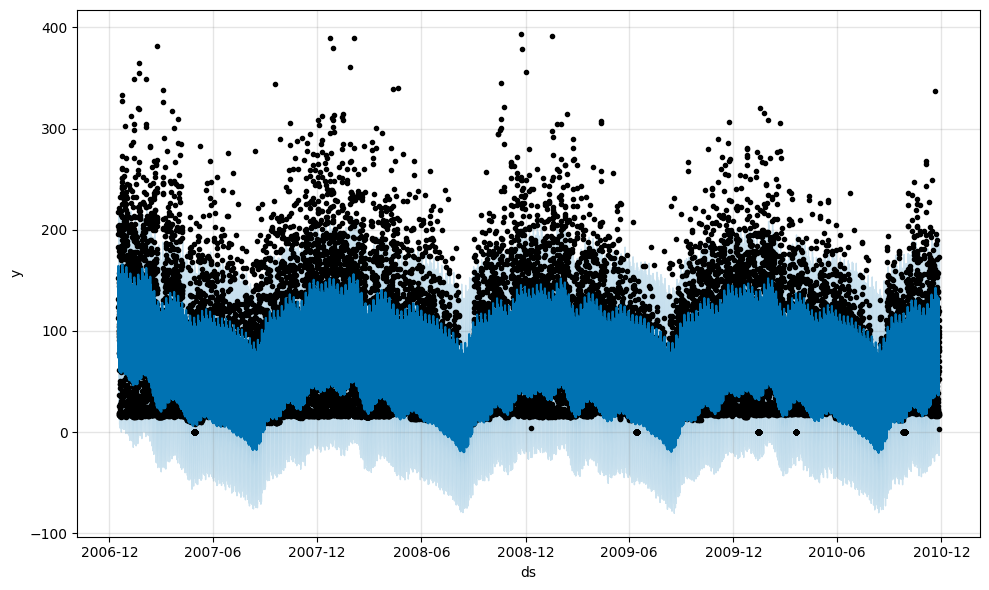

In [79]:
# Showing the predictions in comparison with the actual values
fig = model.plot(prediction)

## Monthly, Daywise and Timewise distribution

C:\Python311\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Python311\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Python311\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['

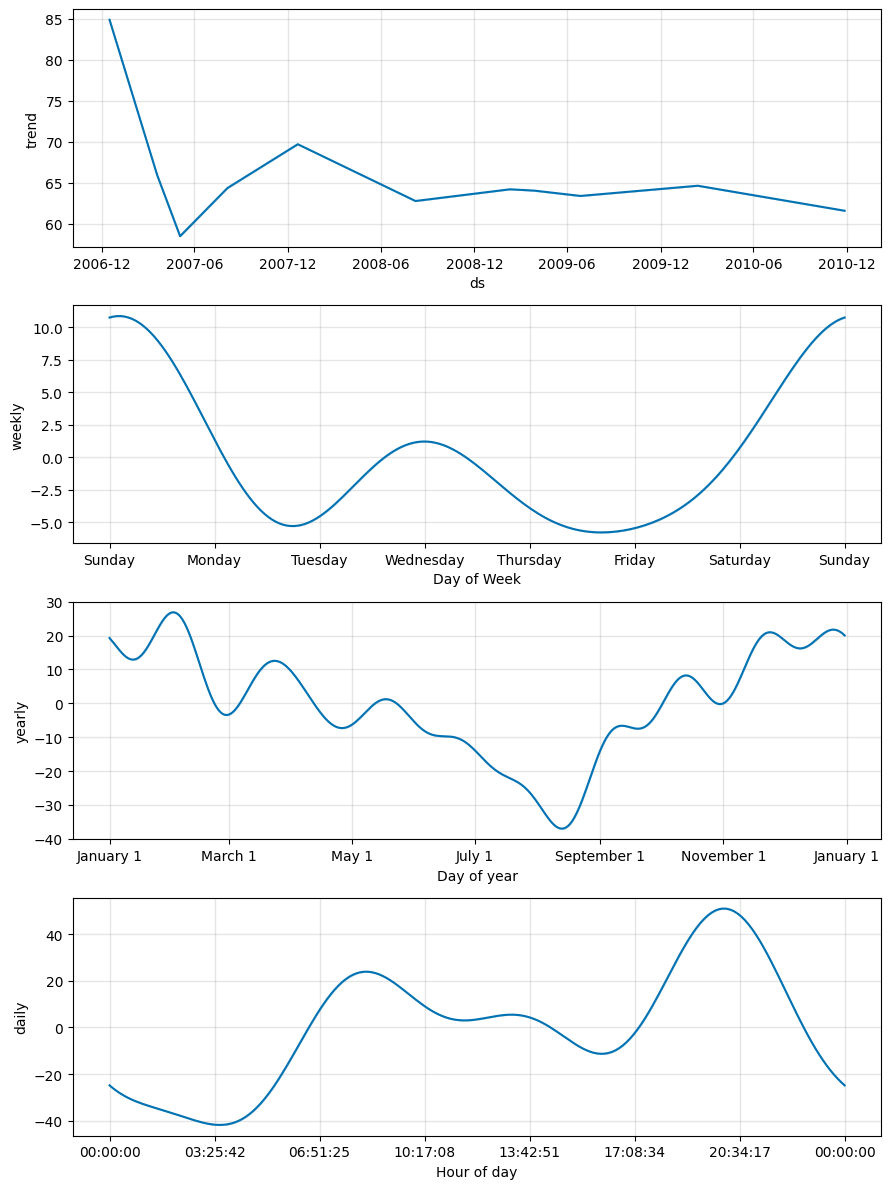

In [80]:
fig = model.plot_components(prediction)

In [81]:
df.head()

,ds,y
0,2006-12-16 17:00:00,152.02
1,2006-12-16 18:00:00,217.93
2,2006-12-16 19:00:00,204.01
3,2006-12-16 20:00:00,196.11
4,2006-12-16 21:00:00,183.39


In [82]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16 17:00:00,84.850096,48.724928,163.511058,84.850096,84.850096,22.800896,22.800896,22.800896,-4.713609,...,8.977776,8.977776,8.977776,18.536728,18.536728,18.536728,0.0,0.0,0.0,107.650991
1,2006-12-16 18:00:00,84.841639,70.682396,186.625428,84.841639,84.841639,43.746056,43.746056,43.746056,15.846343,...,9.341323,9.341323,9.341323,18.558390,18.558390,18.558390,0.0,0.0,0.0,128.587695
2,2006-12-16 19:00:00,84.833182,96.758602,210.363227,84.833182,84.833182,67.842969,67.842969,67.842969,39.591122,...,9.671765,9.671765,9.671765,18.580081,18.580081,18.580081,0.0,0.0,0.0,152.676150
3,2006-12-16 20:00:00,84.824725,106.407553,220.553391,84.824725,84.824725,79.502777,79.502777,79.502777,50.934664,...,9.966313,9.966313,9.966313,18.601800,18.601800,18.601800,0.0,0.0,0.0,164.327502
4,2006-12-16 21:00:00,84.816268,100.073264,213.561622,84.816268,84.816268,70.650934,70.650934,70.650934,41.805028,...,10.222361,10.222361,10.222361,18.623546,18.623546,18.623546,0.0,0.0,0.0,155.467202


# Errors

In [83]:
true_val = df.y

In [84]:
pred_val = org_prediction['yhat']

In [85]:
mean_squared_error(y_true=true_val,y_pred=pred_val)

1934.6816065157786

In [86]:
mean_absolute_error(y_true=true_val,y_pred=pred_val)

32.99106235049959

# Prediction

In [87]:
# Taking an example of the date : 2006-12-16 18:00:00
data = ['2019-02-25 15:00:00']
test = pd.DataFrame(data, columns = ['ds'])

In [88]:
test.ds

0    2019-02-25 15:00:00
Name: ds, dtype: object

In [89]:
# Making a prediction of the model with the test values
val = model.predict(test)

In [90]:
# printing the predicted values "val"
val

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-02-25 15:00:00,29.735845,-38.31819,74.798071,29.735845,29.735845,-13.253818,-13.253818,-13.253818,-5.391965,...,-5.129285,-5.129285,-5.129285,-2.732568,-2.732568,-2.732568,0.0,0.0,0.0,16.482028


In [91]:
# printing the target value "yhat"
val['yhat']

0    16.482028
Name: yhat, dtype: float64

# Saving Model

In [92]:
type(model)

prophet.forecaster.Prophet

In [93]:
pkl_path = "model_household.pkl"

In [94]:
model.stan_backend.logger = None

In [95]:
with open(pkl_path, 'wb') as fout:
    pickle.dump(model, fout)

In [96]:
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)